Data is in https://drive.google.com/file/d/1zdT0bxwsLEZp1U_9QIVLp2mviFnHJvm8/view?usp=sharing Any one with UMD Mail ID can access the data

This notebook is in https://drive.google.com/drive/folders/1mWIQrgo4giHsJo_BY0WJ6rjo_Nfjm4zr?usp=sharing Any one with UMD Mail ID can access the file

**Mounting the drive**

In [1]:
from google.colab import drive
# drive.mount('/content/drive')
drive.mount('/content/drive/')
# PATH = '/content/drive/MyDrive/ENPM808W - Project/'
#PATH = 'drive/MyDrive/ENPM808W - Project/'
PATH = '/content/drive/MyDrive/ENPM808W/Project/'

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


**Importing the libraries**




In [2]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn')
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

**Reading the data**

In [3]:
pd.set_option('display.expand_frame_repr', False)
data = pd.read_csv(PATH + 'us_perm_visas.csv', parse_dates=['decision_date', 'case_received_date'])

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (0,1,2,3,4,5,6,10,11,16,17,20,21,22,25,26,27,28,29,30,31,32,33,34,35,36,37,39,40,41,42,43,44,45,47,48,49,50,51,52,53,55,56,57,58,59,60,61,63,64,65,66,68,69,70,71,72,73,74,77,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,100,101,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,153) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374362 entries, 0 to 374361
Columns: 154 entries, add_these_pw_job_title_9089 to wage_offered_unit_of_pay_9089
dtypes: datetime64[ns](2), float64(10), object(142)
memory usage: 439.8+ MB


#Data Visualization of unprocessed data

In [5]:
df_viz = data.copy()

In [6]:
df_viz['case_status'].value_counts()

Certified            181933
Certified-Expired    148586
Denied                25649
Withdrawn             18194
Name: case_status, dtype: int64

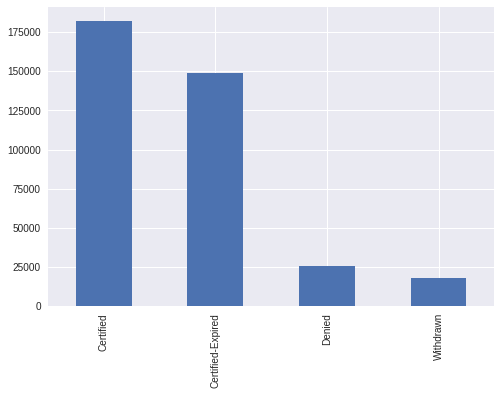

In [7]:
df_viz['case_status'].value_counts().plot(kind = 'bar')

In [8]:
#Removing all withdrawn applications
df_viz = df_viz[df_viz.case_status != 'Withdrawn']

#Combining certified-expired and certified applications
df_viz.loc[df_viz.case_status == 'Certified-Expired', 'case_status'] = 'Certified'

#Now only two labels, Certified and Denied, which are stored in the column case_status

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [9]:
#Convering the date to just the year
df_viz['year'] = df_viz['case_received_date'].dt.year

<ipython-input-9-0eb24fb4a3e1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_viz['year'] = df_viz['case_received_date'].dt.year


In [10]:
#Dropping all empty columns
df_viz = df_viz.dropna(axis=1, how='all');

#Dropping all empty rows
df_viz = df_viz.dropna(axis=0, how='all');

In [11]:
pd.set_option('display.max_colwidth', -1)
i = 0
count_non_nan = [];
ct = [];

for col in df_viz.columns:
    i+=1
    count_non_nan.append(df_viz[col].count())
    ct.append(i)

<ipython-input-11-8bf0eb43248e>:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


Text(0.5, 0, 'Number of non-empty entries')

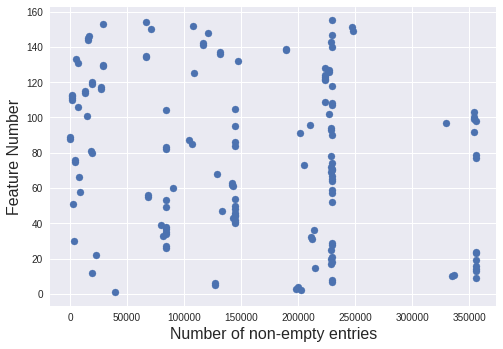

In [12]:
plt.scatter(count_non_nan, ct)
plt.ylabel('Feature Number', fontsize=16)
plt.xlabel('Number of non-empty entries', fontsize=16)

In [13]:
df_viz['case_status'].value_counts()

Certified    330519
Denied       25649 
Name: case_status, dtype: int64

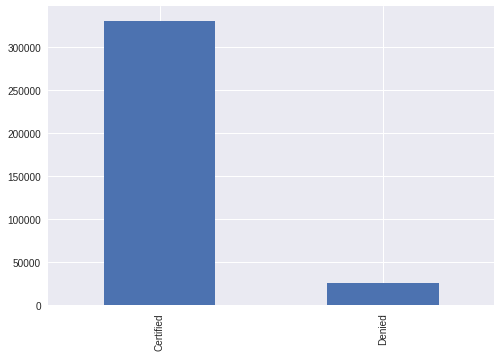

In [14]:
#Total Number of data points of each class of case_status
df_viz['case_status'].value_counts().plot(kind = 'bar')

There are 201 different countries of citizenship in this dataset


[Text(0, 0.5, 'Number of Visa applications'),
 Text(0.5, 0, 'Country of citizenship')]

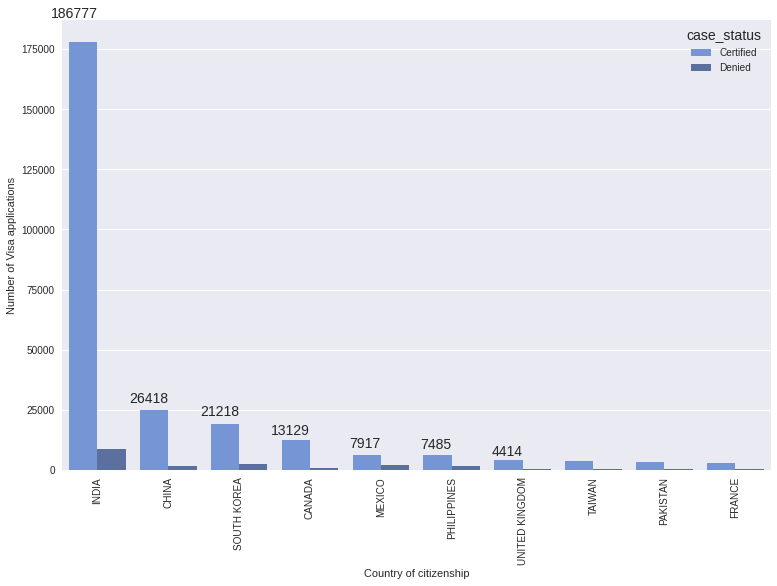

In [15]:
#Graph showing the number of Certified and Denied visa applications for the top 10 countries by number of visa applicants
print('There are', df_viz['country_of_citizenship'].value_counts().count(), \
      'different countries of citizenship in this dataset')
fig, ax = plt.subplots()
fig.set_size_inches(12.7, 8.27)
sns.set_context(rc={"font.size":14, "axes.labelsize":12})
sns.countplot(x='country_of_citizenship',hue='case_status',data=df_viz, 
              palette = sns.diverging_palette(255, 133, l=60, n=7, center="dark"), 
              order=df_viz.country_of_citizenship.value_counts().iloc[:10].index)
plt.xticks(rotation=90)

#Iterating over elements in "country_of_citizenship" column and displaying counts above bars 
for i, v in df_viz.country_of_citizenship.value_counts().head(7).reset_index().iterrows():
    ax.text(i,v.country_of_citizenship,v.unique()[1], horizontalalignment='right',verticalalignment='bottom')

#Setting label titles    
ax.set(xlabel='Country of citizenship', ylabel='Number of Visa applications')

#Graph showing the number of applicants from the countried with the 10 highest number of applicants and the total number of countries

**As we can see, the majority of Visa applications has been submitted by Indian citizens. They constitute to more than half of our observations, we can assume that most of them are computer specialists.**

[Text(0, 0.5, 'Number of Visa applicatons'),
 Text(0.5, 0, 'Visa application year')]

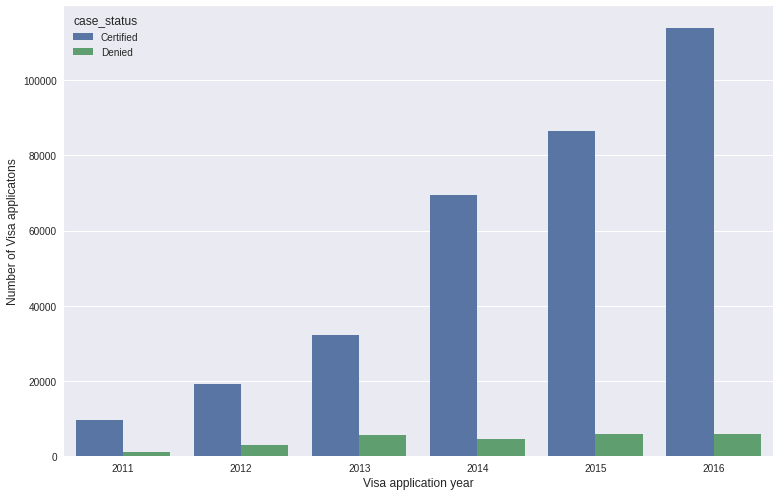

In [16]:
#Converting the date to contain just the year of application submission
df_viz['year'] = df_viz['decision_date'].dt.year

#Setting plot parameters to check number of applications submitted each year in the csv data
fig, ax = plt.subplots()
fig.set_size_inches(12.7, 8.27)
sns.set_context(rc={"font.size":12})
sns.countplot(x="year", hue="case_status", data=df_viz)
ax.set(xlabel='Visa application year', ylabel='Number of Visa applicatons')

**As we can observe, the number of submitted Visa applications increases every year. It's interesting that while the number of positively considered applications increases, the number of "Denied" ones seems to be similar from year 2013. As a next step, let's see, what where the most popular cities**

In [17]:
# Displaying 15 most popular cities
df_viz['employer_city'] = df_viz['employer_city'].str.upper()
df_viz['employer_city'].value_counts().head(15)

NEW YORK           17198
COLLEGE STATION    11985
SANTA CLARA        10519
SAN JOSE           9147 
REDMOND            8485 
MOUNTAIN VIEW      8121 
HOUSTON            6720 
SAN FRANCISCO      6352 
SUNNYVALE          6104 
PLANO              5607 
CHICAGO            5561 
SEATTLE            5051 
EDISON             4056 
LOS ANGELES        4045 
SAN DIEGO          3702 
Name: employer_city, dtype: int64

[Text(0, 0.5, 'Number of Visa applications'), Text(0.5, 0, 'Employer city')]

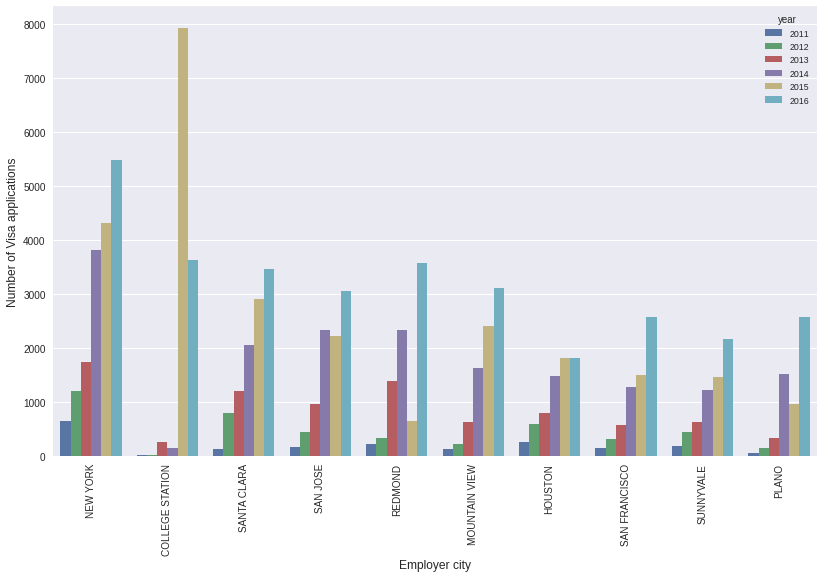

In [18]:
# Setting plot parameters. Plotting 15 most popular cities from 2011 - 2016
fig, ax = plt.subplots()
fig.set_size_inches(13.7, 8.27)
sns.set_context("paper", rc={"font.size":12,"axes.titlesize":12,"axes.labelsize":12})
sns.countplot(x='employer_city', hue='year', data=df_viz, order=df_viz.employer_city.value_counts().iloc[:10].index)
plt.xticks(rotation=90)
ax.set(xlabel='Employer city', ylabel='Number of Visa applications')

**In the last few years, the most popular destination cities were: New York, College Station, Santa Clara, San Jose, Redmond, Mountain View, Houston, SunnyVale, San Francisco and Plano. We saw this above (in the begining) as well.**

**In most of the cities there was a positive trend in Visa applications. A bizarre situation occured in College Station in 2015 where the number of submitted Visa applications was more or less twice large as in other cities.**

**Now, let's take a look what were the most hiring employers and economic sectors through these years. For "us_economic_sector" variable we have only 120 868 non-missing values, but this should give us an insight.**

[Text(0, 0.5, 'Number of Visa applications'), Text(0.5, 0, 'Employer name')]

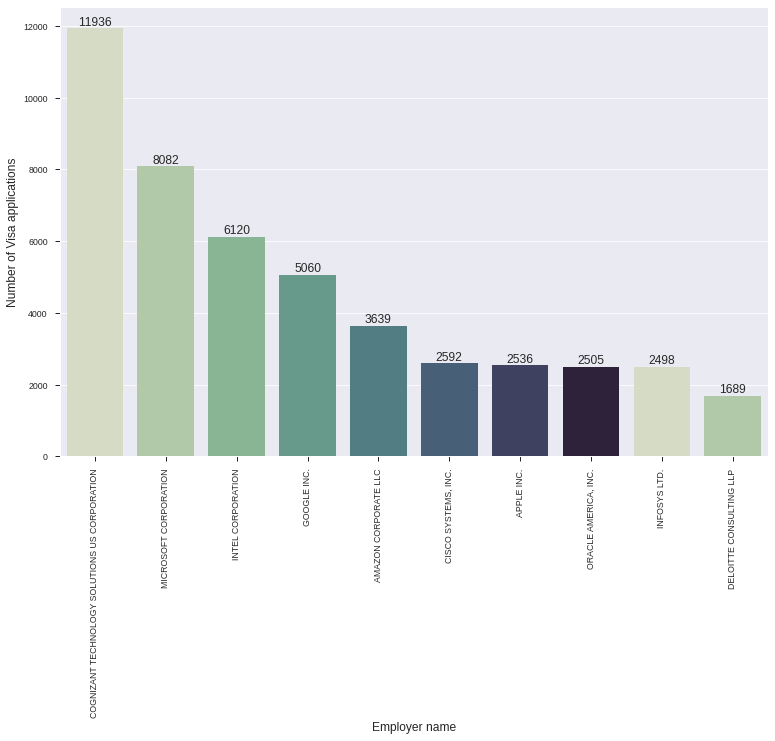

In [19]:
#Setting plot parameters
fig, ax = plt.subplots()
fig.set_size_inches(12.7, 8.27)
sns.set_context(rc={"font.size":12,"axes.labelsize":13})
sns.countplot(x='employer_name', data=df_viz, palette = sns.cubehelix_palette(8, start=.5, rot=-.75), order=df_viz.employer_name.value_counts().iloc[:10].index)
plt.xticks(rotation=90)

#Iterating over elements in "employer_name" column and displaying counts above bars 
for i, v in df_viz.employer_name.value_counts().head(10).reset_index().iterrows():
    ax.text(i,v.employer_name,v.unique()[1], horizontalalignment='center',verticalalignment='bottom')
    
ax.set(xlabel='Employer name', ylabel='Number of Visa applications')

**As we can see, 9 out of 10 most beneficial companies for Visa applicants are IT industry representatives. This leads to the assumption that IT sector is both most favourable and demanding one in United States. Let's check what is the distribution of industries across all Visa applications.**

In [20]:
#Creating empty dictionary
us_economic_counts = {}

#Iterating over "us_economic_sector" column and appending values to the "us_economic_counts" dictionary
for value in df_viz['us_economic_sector'].dropna():
    if value in us_economic_counts:
        us_economic_counts[value] += 1
    else:
        us_economic_counts[value] = 1

([<matplotlib.patches.Wedge at 0x7fd966e85a30>,
 [Text(-0.8119143783551594, -0.7197360920644142, 'IT'),
  Text(0.884195188218691, -0.5663028069248055, 'Other Economic Sector'),
  Text(1.0494163573953816, -0.035004411593524826, 'Aerospace'),
  Text(0.8737715453583406, 0.5822570622346264, 'Advanced Mfg'),
  Text(0.2371273511762825, 1.0228737064389328, 'Educational Services'),
  Text(-0.14734319105720087, 1.0396104963153658, 'Retail'),
  Text(-0.31051630896984056, 1.0030352046980937, 'Construction'),
  Text(-0.3984061894090864, 0.971479545971263, 'Hospitality'),
  Text(-0.47691786550210286, 0.9354407247735788, 'Automotive'),
  Text(-0.6665151122050968, 0.8113307618981468, 'Health Care')],
 [Text(-0.6996681509327872, -0.620233406525555, '45.3%'),
  Text(0.7578815899017352, -0.4854024059355476, '13.5%'),
  Text(0.899499734910327, -0.030003781365878418, '3.6%'),
  Text(0.7489470388785776, 0.499077481915394, '16.2%'),
  Text(0.20325201529395642, 0.876748891233371, '7.9%'),
  Text(-0.126294163

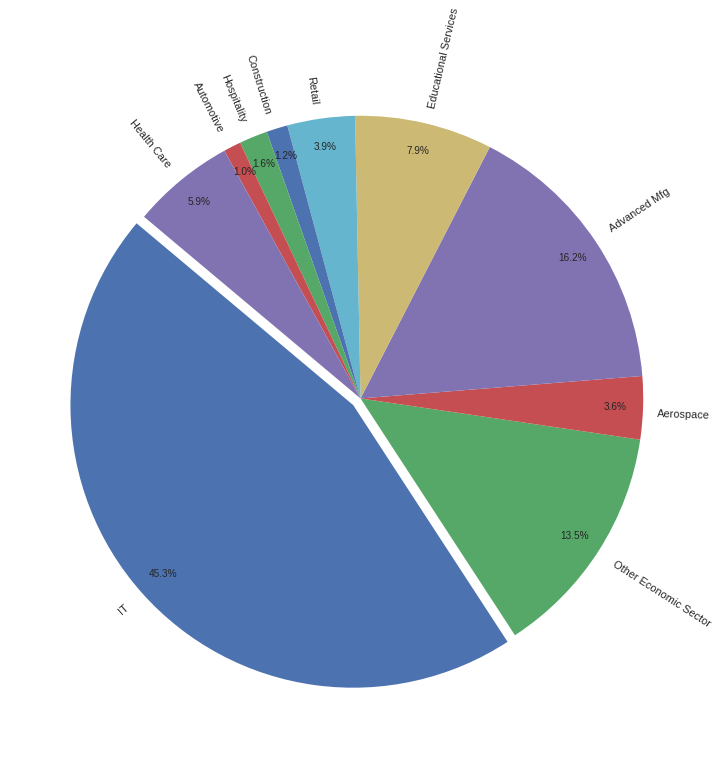

In [21]:
#Creating lists for us economic sectors and their counts
usecolabels = []
usecovalues = []
explode = (0.035, 0, 0, 0,0,0,0,0,0,0)

for key, value in us_economic_counts.items():
    usecolabels.append(key)
    usecovalues.append(value)
    
#Setting plot parameters
plt.figure(figsize=(13,13))    
sns.set_context(rc={"font.size":10,"axes.labelsize":11,"xtick.labelsize" : 11})
plt.pie(usecovalues[:10], labels=usecolabels[:10], explode = explode, autopct='%1.1f%%', pctdistance = 0.9,
          rotatelabels = 90, startangle=140, labeldistance = 1.05) 

**Even the US economic sector sample contained only 120 868 non-missing values, this somehow confirms that IT and Advanced Manufacturing are the most convenient sectors for applying foreigners. As a next step, let's take a look at the most desired job titles, citizenships and class of admission of our Visa applicants.**

In [22]:
df_viz['job_info_job_title'].value_counts()[:20]

Software Engineer                   14372
Computer Systems Analyst - V        4747 
Senior Software Engineer            3801 
Computer Systems Analyst - II       3416 
Software Developer                  2880 
Assistant Professor                 2604 
Programmer Analyst                  2534 
Computer Systems Analyst - IV       2496 
Systems Analyst                     2034 
Software Development Engineer II    1630 
Poultry Processing Worker           1594 
Component Design Engineer           1064 
Poultry Processor                   1037 
Business Analyst                    963  
software engineer                   932  
SOFTWARE ENGINEER                   877  
Senior Programmer Analyst           862  
Sr. Software Engineer               847  
Senior Software Developer           817  
Commercial Cleaner                  802  
Name: job_info_job_title, dtype: int64

**Since our column contains job titles with different letter casing we need to standarize them so that value_counts() method will be able to count them more appropriately. Also, there are lots of same positions like "Computer Systems Analyst" which differ only by the number standing after hyphen so we will split these titles by finding the '-', 'ii' and '/' signs and leaving only the left side of the splitting result. Afterwards, we are going to remove leading and ending spaces, replace "sr." with "senior" values and get rid of 'nan's.**

In [23]:
#Converting values to lower case
df_viz['job_info_job_title'] = df_viz['job_info_job_title'].str.lower()

#Splitting job titles by '-'
df_viz['job_info_job_title'] = df_viz['job_info_job_title'].astype(str).str.split('-').str[0]
#Splitting job titles by 'ii'
df_viz['job_info_job_title'] = df_viz['job_info_job_title'].astype(str).str.split('ii').str[0]
#Splitting job titles by '/'
df_viz['job_info_job_title'] = df_viz['job_info_job_title'].astype(str).str.split('/').str[0]
#Removing leading and ending spaces
df_viz['job_info_job_title'] = df_viz['job_info_job_title'].astype(str).str.strip()
#Replacing "sr." values with "senior"
df_viz['job_info_job_title'] = df_viz['job_info_job_title'].str.replace('sr.', 'senior')
#Replacing "NaN", "NaT" and "nan" values with np.nan
df_viz['job_info_job_title'].replace(["NaN", 'NaT','nan'], np.nan, inplace = True)


df_viz['job_info_job_title'].value_counts(dropna=True)[:10]

<ipython-input-23-5ed4d16d9888>:13: FutureWarning: The default value of regex will change from True to False in a future version.
  df_viz['job_info_job_title'] = df_viz['job_info_job_title'].str.replace('sr.', 'senior')


software engineer                18582
computer systems analyst         12054
senior software engineer         5802 
software developer               4501 
programmer analyst               3763 
assistant professor              2869 
software development engineer    2766 
systems analyst                  2587 
senior programmer analyst        1884 
senior software developer        1625 
Name: job_info_job_title, dtype: int64

[Text(0, 0.5, 'Number of Visa applications'), Text(0.5, 0, 'Job Title')]

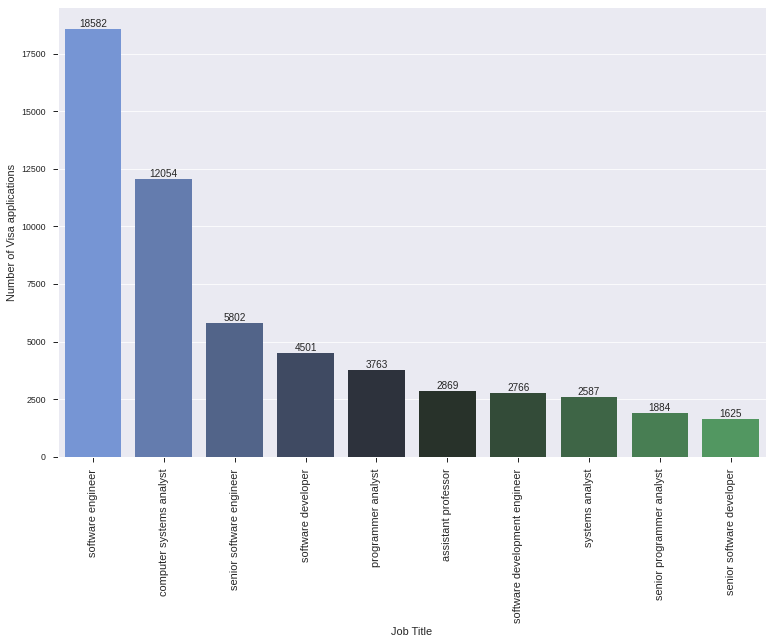

In [24]:
#Setting plot parameters
fig, ax = plt.subplots()
fig.set_size_inches(12.7, 8.27)
 #sns.set_context(rc={"font.size":14, "axes.labelsize":12})
sns.countplot(x='job_info_job_title',data=df_viz, 
               palette = sns.diverging_palette(255, 133, l=60, n=10, center="dark"), 
               order=df_viz.job_info_job_title.value_counts().iloc[:10].index)
plt.xticks(rotation=90)

#Iterating over elements in "job_info_job_title" column and displaying counts above bars 
for i, v in df_viz.job_info_job_title.value_counts().head(10).reset_index().iterrows():
    ax.text(i,v.job_info_job_title,v.unique()[1], horizontalalignment='center',verticalalignment='bottom')

#Setting label titles    
ax.set(xlabel='Job Title', ylabel='Number of Visa applications')

**Interestingely, all of the most popular positions except "assistant professor" are derived from the IT industry. This is another confirmation that there is a huge demand for IT specialists in USA and being one of them increases our chances to obtain a permanent Visa.**

[Text(0, 0.5, 'Number of Visa applications'), Text(0.5, 0, 'Visa type')]

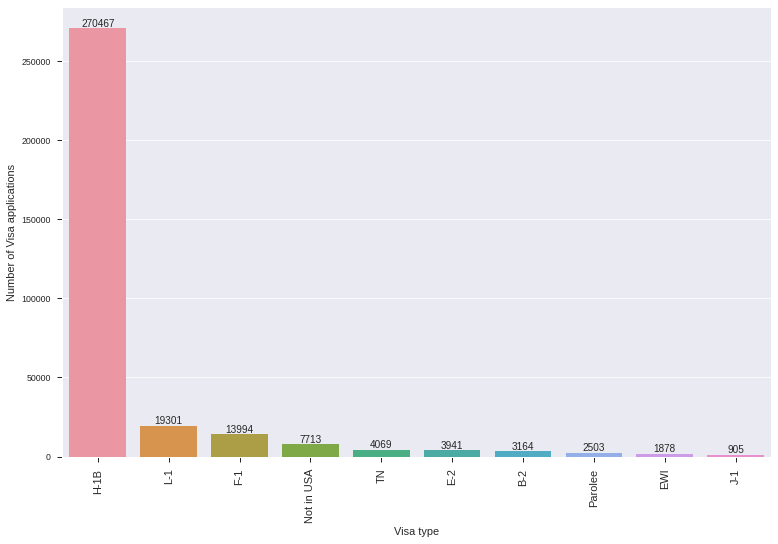

In [25]:
#Setting plot parameters for top-10 visa types
fig, ax = plt.subplots()
fig.set_size_inches(12.7, 8.27)
sns.countplot(x='class_of_admission',data=df_viz, 
              order=df_viz.class_of_admission.value_counts().iloc[:10].index)
plt.xticks(rotation=90)

#Iterating over elements in "class_of_admission" column and displaying counts above bars 
for i, v in df_viz.class_of_admission.value_counts().head(10).reset_index().iterrows():
    ax.text(i,v.class_of_admission,v.unique()[1], horizontalalignment='center',verticalalignment='bottom')
    
ax.set(xlabel='Visa type', ylabel='Number of Visa applications')

**The vast majority of petitioners were applying for the H-1B Visa, which according to the Wikipedia, allows U.S. employers to employ foreign workers in specialty occupations. If a foreign worker in H-1B status quits or is dismissed from the sponsoring employer, the worker must either apply for and be granted a change of status, find another employer (subject to application for adjustment of status and/or change of visa), or leave the United States**

In [26]:
df_viz['application_type'].value_counts()

ONLINE      105616
PERM        19219 
MAILEDIN    2013  
Name: application_type, dtype: int64

[Text(0, 0.5, 'Number of Visa applications'), Text(0.5, 0, 'Application type')]

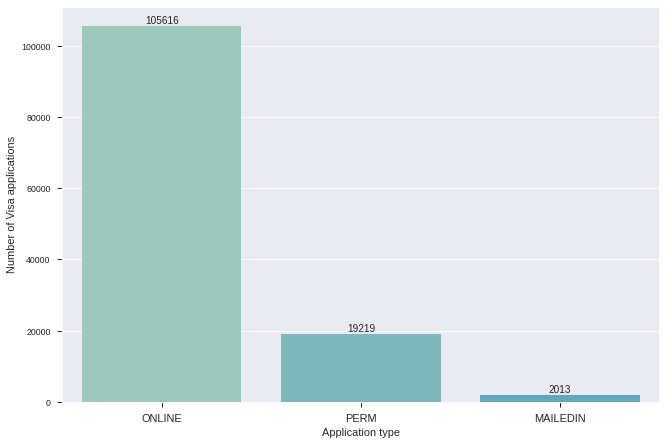

In [27]:
#let's check the number and kind of application types. 
#Unfortunately, our data consists only of 126 848 non-missing values for this attribute, but this should give us a general overview.
fig, ax = plt.subplots()
fig.set_size_inches(10.7, 7.27)
sns.countplot(x='application_type', data=df_viz, palette = sns.color_palette("GnBu_d"), order=df_viz.application_type.value_counts().iloc[:10].index)

#Iterating over elements in "application_type" column and displaying counts above bars 
for i, v in df_viz.application_type.value_counts().head(10).reset_index().iterrows():
    ax.text(i,v.application_type,v.unique()[1], horizontalalignment='center',verticalalignment='bottom')
    
ax.set(xlabel='Application type', ylabel='Number of Visa applications')

**Online submission was the most popular form of application type. Here, we can also find "PERM" value which is probably incorrect. My assumtion is that some petitioners thought about this form field as a distinction between "temporary" and "permanent" Visa type.**

[Text(0, 0.5, 'Number of Visa applications'), Text(0.5, 0, 'Education level')]

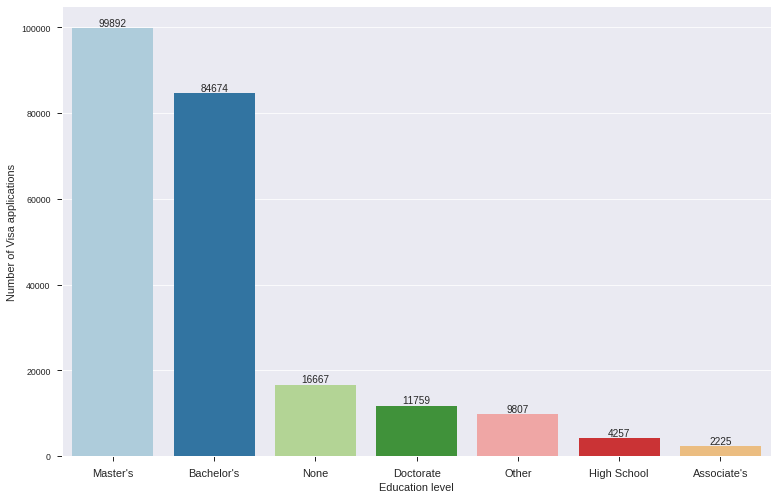

In [28]:
#The last plotting activity will be displaying the applicants education level and remuneration.
fig, ax = plt.subplots()
fig.set_size_inches(12.7, 8.27)
 #sns.set_context(rc={"font.size":14, "axes.labelsize":12})
sns.countplot(x='foreign_worker_info_education',data=df_viz, 
               palette = sns.color_palette("Paired"), 
               order=df_viz.foreign_worker_info_education.value_counts().iloc[:10].index)

#Iterating over elements in "job_info_job_title" column and displaying counts above bars 
for i, v in df_viz.foreign_worker_info_education.value_counts().head(10).reset_index().iterrows():
    ax.text(i,v.foreign_worker_info_education,v.unique()[1], horizontalalignment='center',verticalalignment='bottom')

#Setting label titles    
ax.set(xlabel='Education level', ylabel='Number of Visa applications')

#As we can see, over 50% of applicants obtained a university degree.

#Data Analysis and Exploration




In [29]:
data.head()

,add_these_pw_job_title_9089,agent_city,agent_firm_name,agent_state,application_type,case_no,case_number,case_received_date,case_status,class_of_admission,...,ri_pvt_employment_firm_to,ri_us_workers_considered,schd_a_sheepherder,us_economic_sector,wage_offer_from_9089,wage_offer_to_9089,wage_offer_unit_of_pay_9089,wage_offered_from_9089,wage_offered_to_9089,wage_offered_unit_of_pay_9089
0,NaN,NaN,NaN,NaN,PERM,A-07323-97014,NaN,NaT,Certified,J-1,...,NaN,NaN,NaN,IT,75629.0,NaN,yr,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,PERM,A-07332-99439,NaN,NaT,Denied,B-2,...,NaN,NaN,NaN,Other Economic Sector,37024.0,NaN,yr,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,PERM,A-07333-99643,NaN,NaT,Certified,H-1B,...,NaN,NaN,NaN,Aerospace,47923.0,NaN,yr,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,PERM,A-07339-01930,NaN,NaT,Certified,B-2,...,NaN,NaN,NaN,Other Economic Sector,10.97,NaN,hr,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,PERM,A-07345-03565,NaN,NaT,Certified,L-1,...,NaN,NaN,NaN,Advanced Mfg,100000.0,NaN,yr,NaN,NaN,NaN


Total number of Visa Applications between 2011 and 2016


In [30]:
print('Number of Visa Applications:', len(data))

Number of Visa Applications: 374362


Number of salaried F1 Visa holders (students) earning more than 90K a year


In [31]:
#wage_offer_from_9089, decision_date 
F1_students = data[data['class_of_admission']=='F-1']
F1_students_yearly_wage = F1_students[F1_students['pw_amount_9089']=='yr']
F1_students
wage_distribution = F1_students_yearly_wage [F1_students_yearly_wage['pw_amount_9089']>90000]
print('Number of salaried F1 students earning more than 90K a year:', len(wage_distribution))

#H1B_Holders = data[data['class_of_admission'] == 'H-1B']
#H1B_Holders
#wage_distribution = H1B_Holders [H1B_Holders['pw_amount_9089_new']>90000]
#print("Number of H1B Holders earning more than 90K a year:", len(wage_distribution))




Number of salaried F1 students earning more than 90K a year: 0


The number of F1 Visa student application non linearly increases from 2011 to 2016

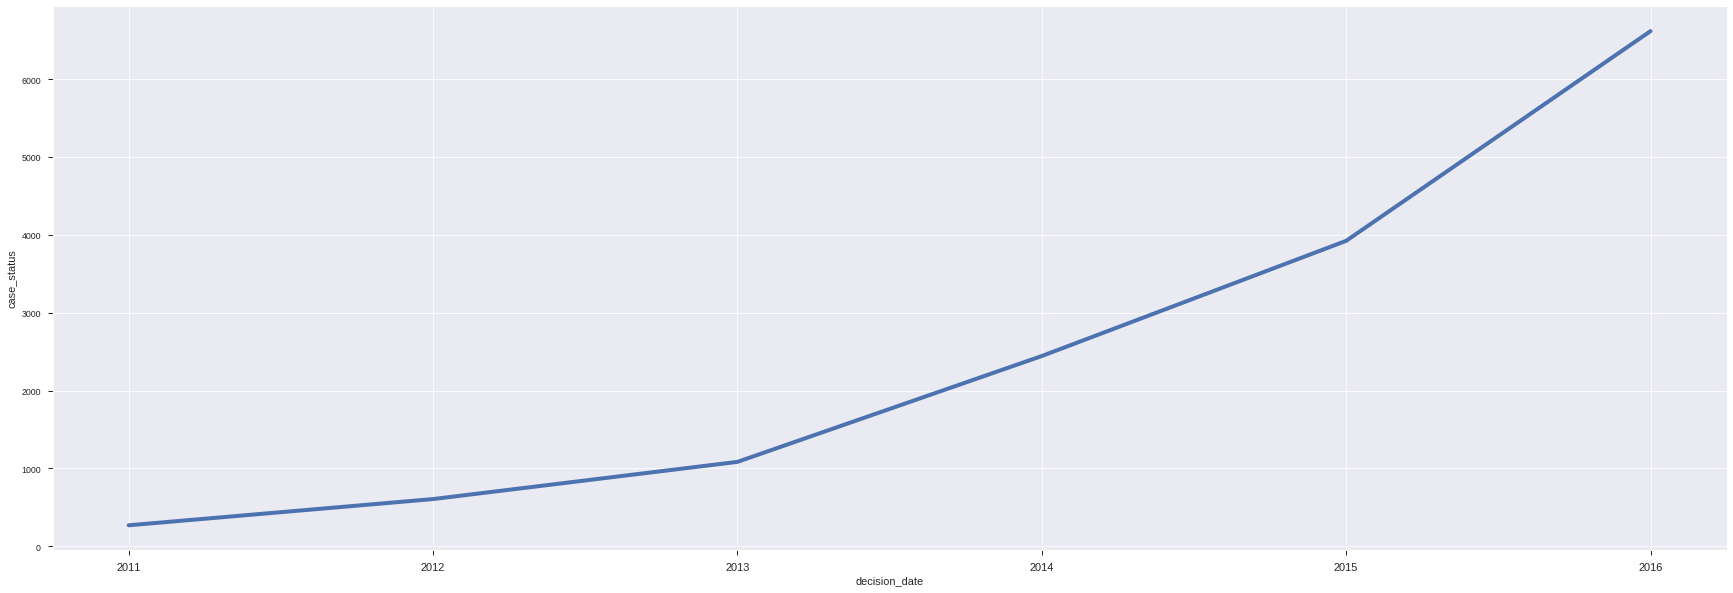

In [32]:
Groupbyyear = F1_students.groupby(pd.DatetimeIndex(F1_students['decision_date']).year).count()
plt.figure(figsize=(30,10))
sns.lineplot(data=Groupbyyear['case_status'],linewidth=4)

#Groupbyyear = H1B_Holders.groupby((H1B_Holders['decision_date'])).count()
#plt.figure(figsize=(30,15))
#sns.lineplot(data=Groupbyyear['case_status'],linewidth=4)

Most Visa are approved for the IT sector!

In [33]:
Certified_visa = data[data['case_status']=='Certified']
#Certified_visa.drop_duplicates().groupby('us_economic_sector').size()

#Data Clean-up

**Finding the number of rows and columns in the dataset**


In [34]:
print("Number of rows in the dataset:",len(data))
print("Number of columns:",len(data.columns))

Number of rows in the dataset: 374362
Number of columns: 154


**Printing the first five rows in the dataset**

In [35]:
data.head()

,add_these_pw_job_title_9089,agent_city,agent_firm_name,agent_state,application_type,case_no,case_number,case_received_date,case_status,class_of_admission,...,ri_pvt_employment_firm_to,ri_us_workers_considered,schd_a_sheepherder,us_economic_sector,wage_offer_from_9089,wage_offer_to_9089,wage_offer_unit_of_pay_9089,wage_offered_from_9089,wage_offered_to_9089,wage_offered_unit_of_pay_9089
0,NaN,NaN,NaN,NaN,PERM,A-07323-97014,NaN,NaT,Certified,J-1,...,NaN,NaN,NaN,IT,75629.0,NaN,yr,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,PERM,A-07332-99439,NaN,NaT,Denied,B-2,...,NaN,NaN,NaN,Other Economic Sector,37024.0,NaN,yr,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,PERM,A-07333-99643,NaN,NaT,Certified,H-1B,...,NaN,NaN,NaN,Aerospace,47923.0,NaN,yr,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,PERM,A-07339-01930,NaN,NaT,Certified,B-2,...,NaN,NaN,NaN,Other Economic Sector,10.97,NaN,hr,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,PERM,A-07345-03565,NaN,NaT,Certified,L-1,...,NaN,NaN,NaN,Advanced Mfg,100000.0,NaN,yr,NaN,NaN,NaN


**Printing the last five rows in the dataset**

In [36]:
data.tail()

,add_these_pw_job_title_9089,agent_city,agent_firm_name,agent_state,application_type,case_no,case_number,case_received_date,case_status,class_of_admission,...,ri_pvt_employment_firm_to,ri_us_workers_considered,schd_a_sheepherder,us_economic_sector,wage_offer_from_9089,wage_offer_to_9089,wage_offer_unit_of_pay_9089,wage_offered_from_9089,wage_offered_to_9089,wage_offered_unit_of_pay_9089
374357,NaN,Buena Park,Law Offices of Yohan Lee,CA,NaN,NaN,A-16363-85407,2016-12-29,Withdrawn,NaN,...,NaN,NaN,N,NaN,"28,330.00",NaN,Year,NaN,NaN,NaN
374358,NaN,Seattle,MacDonald Hoague & Bayless,WA,NaN,NaN,A-16271-56745,2016-12-30,Withdrawn,L-1,...,NaN,Y,N,NaN,"122,000.00","142,000.00",Year,NaN,NaN,NaN
374359,NaN,Schaumburg,"International Legal and Business Services Group, LLP",IL,NaN,NaN,A-16354-82345,2016-12-30,Withdrawn,H-1B,...,NaN,NaN,N,NaN,"79,082.00","79,082.00",Year,NaN,NaN,NaN
374360,NaN,LOS ANGELES,LAW OFFICES OF JAMES S HONG,CA,NaN,NaN,A-16357-84250,2016-12-30,Withdrawn,B-2,...,NaN,NaN,N,NaN,"37,981.00",NaN,Year,NaN,NaN,NaN
374361,NaN,Phoenix,"Fragomen, Del Rey, Bernsen & Loewy, LLP",AZ,NaN,NaN,A-16279-59292,2016-12-30,Withdrawn,H-1B,...,NaN,NaN,N,NaN,"84,926.00","121,500.00",Year,NaN,NaN,NaN


**As we can see there are 374362 rows and 154 columns in the dataset.Lets display the names of all the columns.**

In [37]:
print(data.columns.values)

['add_these_pw_job_title_9089' 'agent_city' 'agent_firm_name'
 'agent_state' 'application_type' 'case_no' 'case_number'
 'case_received_date' 'case_status' 'class_of_admission'
 'country_of_citizenship' 'country_of_citzenship' 'decision_date'
 'employer_address_1' 'employer_address_2' 'employer_city'
 'employer_country' 'employer_decl_info_title' 'employer_name'
 'employer_num_employees' 'employer_phone' 'employer_phone_ext'
 'employer_postal_code' 'employer_state' 'employer_yr_estab'
 'foreign_worker_info_alt_edu_experience'
 'foreign_worker_info_birth_country' 'foreign_worker_info_city'
 'foreign_worker_info_education' 'foreign_worker_info_education_other'
 'foreign_worker_info_inst' 'foreign_worker_info_major'
 'foreign_worker_info_postal_code' 'foreign_worker_info_rel_occup_exp'
 'foreign_worker_info_req_experience' 'foreign_worker_info_state'
 'foreign_worker_info_training_comp' 'foreign_worker_ownership_interest'
 'foreign_worker_yr_rel_edu_completed' 'fw_info_alt_edu_experience'

**The columns 'case_no' and 'case_number' may have similar information. Let's check their lengths, missing(null) values and sample values**

In [38]:
print("Length of 'case_no' is:",len(data['case_no']))
print("Length of 'case_number' is:",len(data['case_number']))

Length of 'case_no' is: 374362
Length of 'case_number' is: 374362


**Lengths are same**

In [39]:
case_no_nulls = data.case_no.isnull().sum()
case_number_nulls = data.case_number.isnull().sum()
case_no_nonnulls = len(data['case_no']) - case_no_nulls
case_number_nonnulls = len(data['case_number']) - case_number_nulls
print("Null values for 'case_no' is:", case_no_nulls)
print("Null values for 'case_number' is:", case_number_nulls)
print("Non-Null values for 'case_no' is:",case_no_nonnulls)
print("Non-Null values for 'case_number' is:",case_number_nonnulls)
print("Total number of null observations from both columns are:", case_no_nulls + case_number_nulls)
print("Total number of non-null observations from both columns are:", case_no_nonnulls + case_number_nonnulls)

Null values for 'case_no' is: 239093
Null values for 'case_number' is: 135269
Non-Null values for 'case_no' is: 135269
Non-Null values for 'case_number' is: 239093
Total number of null observations from both columns are: 374362
Total number of non-null observations from both columns are: 374362


**Column 'case_no' is having 239093 null values and 135269 non null values**


**Column 'case_number' is having 135269 null values and 239093 non null values**


**These columns are similar to each other as their null values and non-null values sum up to the total number of observations. So we will combine these columns into a single column which contains only non null values and then remove these columns.**

In [40]:
case_no_index = data.columns.get_loc("case_no")
case_number_index = data.columns.get_loc("case_number")
#print(case_no_index)
#print(case_number_index)
case_number_list = []

for value in data.iloc[0:135269,case_no_index]:
    case_number_list.append(value)
    
for value in data.iloc[135269:374363,case_number_index]:
    case_number_list.append(value)
    
data['casenumber'] = case_number_list

**Removing the columns 'case_no' and 'case_number' from the dataset**

In [41]:
data.drop(data.columns[[case_no_index,case_number_index]], axis=1, inplace=True)

**Columns 'country_of_citizenship' and 'country_of_citzenship' looks similar, let's investigate more about their lengths, missing values and sample values**

In [42]:
print("Length of 'country_of_citizenship' is:",len(data['country_of_citizenship']))
print("Length of 'country_of_citzenship' is:",len(data['country_of_citzenship']))

Length of 'country_of_citizenship' is: 374362
Length of 'country_of_citzenship' is: 374362


**Lengths are same**

In [43]:
country_of_citizenship_nulls = data.country_of_citizenship.isnull().sum()
country_of_citzenship_nulls = data.country_of_citzenship.isnull().sum()
country_of_citizenship_nonnulls = len(data['country_of_citizenship']) - country_of_citizenship_nulls
country_of_citzenship_nonnulls = len(data['country_of_citzenship']) - country_of_citzenship_nulls
print("Null values for 'country_of_citizenship' is:", country_of_citizenship_nulls)
print("Non-Null values for 'country_of_citizenship' is:",country_of_citizenship_nonnulls)
print("Null values for 'country_of_citzenship' is:", country_of_citzenship_nulls)
print("Non-Null values for 'country_of_citzenship' is:",country_of_citzenship_nonnulls)
totalnulls = country_of_citizenship_nulls + country_of_citzenship_nulls
print("Total number null values in both columns is:", totalnulls)
totalnonnulls = country_of_citizenship_nonnulls + country_of_citzenship_nonnulls
print("Total number non-null values in both columns is:", totalnonnulls)
print("Difference between total nulls and length of citizenship column", int(len(data['country_of_citizenship']) - totalnulls))
print("Difference between total non-nulls and length of citzenship column", int(len(data['country_of_citzenship']) - totalnonnulls))


Null values for 'country_of_citizenship' is: 20633
Non-Null values for 'country_of_citizenship' is: 353729
Null values for 'country_of_citzenship' is: 353788
Non-Null values for 'country_of_citzenship' is: 20574
Total number null values in both columns is: 374421
Total number non-null values in both columns is: 374303
Difference between total nulls and length of citizenship column -59
Difference between total non-nulls and length of citzenship column 59


**Looks like the columns 'country_of_citizenship' and 'country_of_citizenship' are having differnt number of null and non-null values but there is a pattern in maintaining these values in both the columns. I found there will be 59 null values even after combining the two columns**

In [44]:
country_of_citizenship_index = data.columns.get_loc("country_of_citizenship")
country_of_citzenship_index = data.columns.get_loc("country_of_citzenship")
#print(country_of_citizenship_index)
#print(country_of_citzenship_index)
countryofcitizenshiplist = []

for value in data.iloc[0:20576,country_of_citzenship_index]:
  countryofcitizenshiplist.append(value)

for value in data.iloc[20576:374363,country_of_citizenship_index]:
  countryofcitizenshiplist.append(value)
    
data['countryofcitizenship'] = countryofcitizenshiplist
print(data['countryofcitizenship'].isnull().sum())
print(data['countryofcitizenship'])

59
0         ARMENIA    
1         POLAND     
2         INDIA      
3         SOUTH KOREA
4         CANADA     
           ...       
374357    SOUTH KOREA
374358    VIETNAM    
374359    INDIA      
374360    SOUTH KOREA
374361    CHINA      
Name: countryofcitizenship, Length: 374362, dtype: object


**Removing the columns 'country_of_citizenship' and 'country_of_citzenship' from the dataset**

In [45]:
data.drop(data.columns[[country_of_citizenship_index,country_of_citzenship_index]], axis=1, inplace=True)

In [46]:
data = data.dropna(subset=['countryofcitizenship'])

**Now let's check the column : "case_status" and check for its unique values as it may contain critical information regarding the decision made for each visa application**

In [47]:
data['case_status'].unique()

array(['Certified', 'Denied', 'Certified-Expired', 'Withdrawn'],
      dtype=object)

In [48]:
#Finding the number of repetitions for each status category
for col in data.case_status.unique():
    print(len(data[data['case_status'] == col])," - {}".format(col))

181933  - Certified
25595  - Denied
148585  - Certified-Expired
18190  - Withdrawn


**Here we are ignoring the Withdrawn category as it may be deviating from our end goal. Also we will merged the Certified and Certified-Expired category to a single category and in that way, there will be only two categories which are Certified and Denied in the dataset to maintain consistency.**




**Certified-Expired category referes to the case where petitioners have 6 months of time to file I-140 form after receiving the status of "Certified" before it expires and turns to "Certified-Expired" status.**

In [49]:
#Removing 'Withdrawn' category from case_status column
data = data[data.case_status != 'Withdrawn']


#Combining 'Certified-Expired' and 'Certified' categories and displaying the counts of "case_status" column
data.loc[data.case_status == 'Certified-Expired', 'case_status'] = 'Certified'
data.case_status.value_counts()

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


Certified    330518
Denied       25595 
Name: case_status, dtype: int64

In [50]:
print("Number of rows:",len(data))
print("Number of columns:", len(data.columns))
data.head()

Number of rows: 356113
Number of columns: 152


,add_these_pw_job_title_9089,agent_city,agent_firm_name,agent_state,application_type,case_received_date,case_status,class_of_admission,decision_date,employer_address_1,...,schd_a_sheepherder,us_economic_sector,wage_offer_from_9089,wage_offer_to_9089,wage_offer_unit_of_pay_9089,wage_offered_from_9089,wage_offered_to_9089,wage_offered_unit_of_pay_9089,casenumber,countryofcitizenship
0,NaN,NaN,NaN,NaN,PERM,NaT,Certified,J-1,2012-02-01,24 WEST 25 STREET,...,NaN,IT,75629.0,NaN,yr,NaN,NaN,NaN,A-07323-97014,ARMENIA
1,NaN,NaN,NaN,NaN,PERM,NaT,Denied,B-2,2011-12-21,200 BROAD STREET,...,NaN,Other Economic Sector,37024.0,NaN,yr,NaN,NaN,NaN,A-07332-99439,POLAND
2,NaN,NaN,NaN,NaN,PERM,NaT,Certified,H-1B,2011-12-01,1054 TECHNOLOGY PARK DRIVE,...,NaN,Aerospace,47923.0,NaN,yr,NaN,NaN,NaN,A-07333-99643,INDIA
3,NaN,NaN,NaN,NaN,PERM,NaT,Certified,B-2,2011-12-01,33-17 PRINCE ST. 2ND FL,...,NaN,Other Economic Sector,10.97,NaN,hr,NaN,NaN,NaN,A-07339-01930,SOUTH KOREA
4,NaN,NaN,NaN,NaN,PERM,NaT,Certified,L-1,2012-01-26,1373 BROADWAY,...,NaN,Advanced Mfg,100000.0,NaN,yr,NaN,NaN,NaN,A-07345-03565,CANADA


**Now, let's perform dimensionality reduction by removing rows and columns containing only 'Null' values**

In [51]:
#Dropping all empty rows
data = data.dropna(axis=0, how='all');

#Dropping all empty columns
data = data.dropna(axis=1, how='all');

data.shape

(356113, 152)

**It looks like there are neither rows nor columns containing only 'Null' values.so let's check how many columns contains any missing values**

In [52]:
# Displaying number of missing values in each column
for column in data.columns:
    print("Columns '{}' contains ".format(column),  data[column].isnull().sum().sum(), " missing values")

Columns 'add_these_pw_job_title_9089' contains  316982  missing values
Columns 'agent_city' contains  153416  missing values
Columns 'agent_firm_name' contains  157610  missing values
Columns 'agent_state' contains  156506  missing values
Columns 'application_type' contains  229287  missing values
Columns 'case_received_date' contains  126826  missing values
Columns 'case_status' contains  0  missing values
Columns 'class_of_admission' contains  21045  missing values
Columns 'decision_date' contains  0  missing values
Columns 'employer_address_1' contains  34  missing values
Columns 'employer_address_2' contains  140991  missing values
Columns 'employer_city' contains  8  missing values
Columns 'employer_country' contains  126892  missing values
Columns 'employer_decl_info_title' contains  126862  missing values
Columns 'employer_name' contains  5  missing values
Columns 'employer_num_employees' contains  126894  missing values
Columns 'employer_phone' contains  126856  missing values


In [53]:
from pandas.core.arrays.interval import unique
for col in data.class_of_admission.unique():
    l = (len(data[data['class_of_admission'] == col]),"{}".format(col))
    #print(l)

# Data Clean-up : Version2

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 356113 entries, 0 to 374353
Columns: 152 entries, add_these_pw_job_title_9089 to countryofcitizenship
dtypes: datetime64[ns](2), float64(10), object(140)
memory usage: 415.7+ MB


In [55]:
data.application_type.unique()

array(['PERM', 'ONLINE', 'MAILEDIN', nan], dtype=object)

In [56]:
data.shape

(356113, 152)

**Removing unneccessary columns from the dataset**

In [57]:
sum(data.count() < 175000)

82

**So, 72 columns out of 152 are having less than 50% of entries(row data) which are Null values, Hence remvoing them from the dataset as unneccessary columns created many issues during the analysis and exploration**

In [58]:
data = data.loc[:, pd.notnull(data).sum()>len(data)*.35]
print(data.shape)

(356113, 93)


**Dropping the null value columns which are unneccessary**

In [59]:
#Assigning Labels to Case Status
data.loc[data.case_status == 'Certified', 'case_status'] = 1
data.loc[data.case_status == 'Denied', 'case_status'] = 0

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


**Column Case_Status : O for Denied and 1 for Certified**

In [60]:
data['pw_unit_of_pay_9089'].unique()

array(['yr', 'hr', nan, 'bi', 'mth', 'wk', 'Hour', 'Year', 'Bi-Weekly',
       'Week', 'Month'], dtype=object)

In [61]:
D = {"Year": 1, "yr": 1, "Hour": 2080, "hr": 2080, "Week": 52, "wk": 52, "Bi-Weekly": 26,"bi": 26, "Month": 12, "mth": 12}
data['pw_unit_of_pay_9089'].replace(D, inplace=True)

**Calculating pay based on unit of pay and wage**

In [62]:
data['pw_amount_9089'] = data['pw_amount_9089'].str.replace(',', '')
data[['pw_amount_9089', 'pw_unit_of_pay_9089']] = data[['pw_amount_9089', 'pw_unit_of_pay_9089']].astype(float)
data['pw_amount_9089_new'] = data['pw_amount_9089']*data['pw_unit_of_pay_9089']
data['pw_amount_9089_new']=data['pw_amount_9089_new'].fillna((data['pw_amount_9089_new'].mean()))

#Dropping redundant pay related features
data = data.drop('pw_amount_9089', 1)
data = data.drop('pw_unit_of_pay_9089', 1)


<ipython-input-62-c38d53be1e62>:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data = data.drop('pw_amount_9089', 1)
<ipython-input-62-c38d53be1e62>:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data = data.drop('pw_unit_of_pay_9089', 1)


**Removed anamolies and Null Values**

In [63]:
#Extracting year from column 'decision_date' and converting to an integer value
data['decision_date'] = data['decision_date'].dt.year
data['decision_date'] = data['decision_date'].astype(int)
data['decision_date']=data['decision_date'].fillna((data['decision_date'].mean()))
data['decision_date']

0         2012
1         2011
2         2011
3         2011
4         2012
          ... 
374349    2016
374350    2016
374351    2016
374352    2016
374353    2016
Name: decision_date, Length: 356113, dtype: int64

**Extracted the year from the column : decision_date to facilitate the visualizations**

In [64]:
#Since there are too many unknown values, it is treated as a new value
data['agent_state'].fillna('Unknown');

#Mapping from state name to short form
US_state_abbrevation = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY',
    'Northern Mariana Islands':'MP', 
    'Palau': 'PW', 
    'Puerto Rico': 'PR', 
    'Virgin Islands': 'VI', 
    'District of Columbia': 'DC'
}

#Capitalizing Keys
US_state_abbrevation = {k.upper(): v for k, v in US_state_abbrevation.items()}
data['agent_state'].replace(US_state_abbrevation, inplace=True)
data.agent_state = data.agent_state.astype(str)

In [65]:
#Similarly for Column : employer_state
data['employer_state'] = data['employer_state'].fillna(data['employer_state'].mode()[0]);

#Capitalizing Keys
US_state_abbrevation = {k.upper(): v for k, v in US_state_abbrevation.items()}
data['employer_state'].replace(US_state_abbrevation, inplace=True)
data.employer_state = data.employer_state.astype(str)


#Similarly for column job_info_work_state
data['job_info_work_state'] = data['job_info_work_state'].fillna(data['job_info_work_state'].mode()[0]);

#Capitalizing Keys
US_state_abbrevation = {k.upper(): v for k, v in US_state_abbrevation.items()}
data['job_info_work_state'].replace(US_state_abbrevation, inplace=True)
data.job_info_work_state = data.job_info_work_state.astype(str)

In [66]:
data['pw_soc_code'] = data['pw_soc_code'].str.replace('.','')
data['pw_soc_code'] = data['pw_soc_code'].str.replace('-','')
data['pw_soc_code'] = data['pw_soc_code'].astype(str).str[0:6]
data['pw_soc_code'].value_counts()
empty_soc_index = data['pw_soc_code'] == "nan"
data['pw_soc_code'][empty_soc_index] = data['pw_soc_code'].mode()[0];

empty_soc_index = data['pw_soc_code'] == "None"
data['pw_soc_code'][empty_soc_index] = data['pw_soc_code'].mode()[0];

<ipython-input-66-72865f6f88fd>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['pw_soc_code'] = data['pw_soc_code'].str.replace('.','')
<ipython-input-66-72865f6f88fd>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['pw_soc_code'][empty_soc_index] = data['pw_soc_code'].mode()[0];
<ipython-input-66-72865f6f88fd>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['pw_soc_code'][empty_soc_index] = data['pw_soc_code'].mode()[0];


In [67]:
data['pw_soc_code'] = data['pw_soc_code'].astype(float)

data['pw_soc_code'] = data['pw_soc_code'].astype(int)

data['case_status'] = data['case_status'].astype(int)

In [68]:
#Replace the values with the mode or mean
data['class_of_admission']=data['class_of_admission'].fillna((data['class_of_admission'].mode()[0]))

data['countryofcitizenship']=data['countryofcitizenship'].fillna((data['countryofcitizenship'].mode()[0]))


data['employer_name']=data['employer_name'].fillna((data['employer_name'].mode()[0]))
data['employer_name']=data['employer_name'].astype(str).str.upper()


data['pw_source_name_9089']=data['pw_source_name_9089'].fillna((data['pw_source_name_9089'].mode()[0]))


data['employer_yr_estab']=data['employer_yr_estab'].fillna(1700.0)
data['employer_yr_estab'] = data['employer_yr_estab'].astype(int)
data['employer_yr_estab'].value_counts()
data.loc[data['employer_yr_estab'] < 1700, 'employer_yr_estab'] = 1700

data['employer_country']=data['employer_country'].fillna((data['employer_country'].mode()[0]))

data['employer_num_employees']=data['employer_num_employees'].fillna((data['employer_num_employees'].mean()))

In [69]:
data['pw_amount_9089_new']

0         90325.50252 
1         90325.50252 
2         90325.50252 
3         90325.50252 
4         90325.50252 
             ...      
374349    84635.00000 
374350    69098.00000 
374351    114795.00000
374352    112354.00000
374353    136219.00000
Name: pw_amount_9089_new, Length: 356113, dtype: float64

In [70]:
#Since running "describe" method on "pw_amount_9089" column returned exponential values, I decided to convert them to floats so that they are easier to understand
with pd.option_context('float_format', '{:.2f}'.format): print(data.pw_amount_9089_new.describe())

count   356113.00   
mean    90325.50    
std     529774.91   
min     624.00      
25%     90325.50    
50%     90325.50    
75%     90325.50    
max     221035360.00
Name: pw_amount_9089_new, dtype: float64


In [71]:
data['decision_date']

0         2012
1         2011
2         2011
3         2011
4         2012
          ... 
374349    2016
374350    2016
374351    2016
374352    2016
374353    2016
Name: decision_date, Length: 356113, dtype: int64

In [72]:
#Dividing continuous income values into categories to facilitate the visualization
data['wage'] = pd.cut(data['pw_amount_9089_new'], [0, 30000, 60000,90000,120000,150000,180000,210000,240000,270000,495748000], right=False, labels=["0-30k", "30-60k","60-90k","90-120k","120-150k","150-180k","180-210k","210-240k","240-270k","270k+"])
salary = data['wage'].value_counts()
salary.iloc[np.argsort(salary.index)]

0-30k       6566  
30-60k      15191 
60-90k      40390 
90-120k     280925
120-150k    9599  
150-180k    2009  
180-210k    1224  
210-240k    192   
240-270k    8     
270k+       9     
Name: wage, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


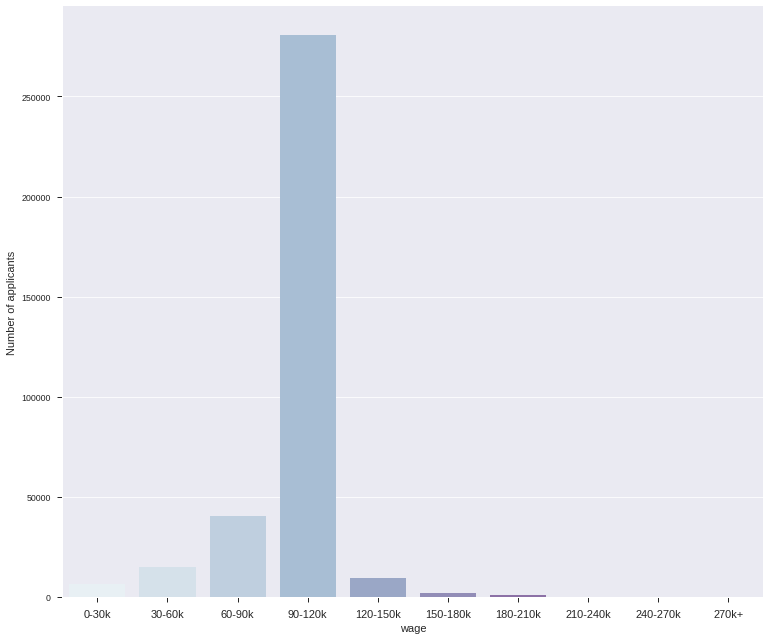

In [73]:
# Draw a count plot to show the distribution of remunerations
g = sns.factorplot(x='wage', data=data, kind="count",
                   palette="BuPu", size=9, aspect=1.2)

g.set(xlabel='wage', ylabel='Number of applicants')

**As we can see, over 90% of the applicants earn between 60 and 120 thousand dollars yearly. From this moment, we will start working on the feature selection and data cleaning.**

In [74]:
#Displaying percentage of non-null values for each feature
i = 0;
for col in data.columns:
    i = i+1;
    print (i-1,"Column: '{}'".format(col),"contains ", np.round(100*data[col].count()/len(data['case_status']),decimals=2),"% non-null values" )

0 Column: 'agent_city' contains  56.92 % non-null values
1 Column: 'agent_firm_name' contains  55.74 % non-null values
2 Column: 'agent_state' contains  100.0 % non-null values
3 Column: 'application_type' contains  35.61 % non-null values
4 Column: 'case_received_date' contains  64.39 % non-null values
5 Column: 'case_status' contains  100.0 % non-null values
6 Column: 'class_of_admission' contains  100.0 % non-null values
7 Column: 'decision_date' contains  100.0 % non-null values
8 Column: 'employer_address_1' contains  99.99 % non-null values
9 Column: 'employer_address_2' contains  60.41 % non-null values
10 Column: 'employer_city' contains  100.0 % non-null values
11 Column: 'employer_country' contains  100.0 % non-null values
12 Column: 'employer_decl_info_title' contains  64.38 % non-null values
13 Column: 'employer_name' contains  100.0 % non-null values
14 Column: 'employer_num_employees' contains  100.0 % non-null values
15 Column: 'employer_phone' contains  64.38 % non-null

In [75]:
data.shape

(356113, 93)

In [76]:
#Leaving columns which have more than 330000 non-missing observations
data = data.loc[:,data.count() >= 356112]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 356113 entries, 0 to 374353
Data columns (total 16 columns):
 #   Column                  Non-Null Count   Dtype   
---  ------                  --------------   -----   
 0   agent_state             356113 non-null  object  
 1   case_status             356113 non-null  int64   
 2   class_of_admission      356113 non-null  object  
 3   decision_date           356113 non-null  int64   
 4   employer_country        356113 non-null  object  
 5   employer_name           356113 non-null  object  
 6   employer_num_employees  356113 non-null  float64 
 7   employer_state          356113 non-null  object  
 8   employer_yr_estab       356113 non-null  int64   
 9   job_info_work_state     356113 non-null  object  
 10  pw_soc_code             356113 non-null  int64   
 11  pw_source_name_9089     356113 non-null  object  
 12  casenumber              356113 non-null  object  
 13  countryofcitizenship    356113 non-null  object  
 14  pw_a

**Date Type Conversion**

In [77]:
categorical_variables = {}

#Creating categories denoted by integers from column values
for col in data.columns:
    cat_var_name = "cat_"+ col
    cat_var_name = LabelEncoder()
    cat_var_name.fit(data[col])
    data[col] = cat_var_name.transform(data[col])
    categorical_variables[col] = cat_var_name

data.info()

<ipython-input-77-bfc26ebe26c9>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = cat_var_name.transform(data[col])


<class 'pandas.core.frame.DataFrame'>
Int64Index: 356113 entries, 0 to 374353
Data columns (total 16 columns):
 #   Column                  Non-Null Count   Dtype
---  ------                  --------------   -----
 0   agent_state             356113 non-null  int64
 1   case_status             356113 non-null  int64
 2   class_of_admission      356113 non-null  int64
 3   decision_date           356113 non-null  int64
 4   employer_country        356113 non-null  int64
 5   employer_name           356113 non-null  int64
 6   employer_num_employees  356113 non-null  int64
 7   employer_state          356113 non-null  int64
 8   employer_yr_estab       356113 non-null  int64
 9   job_info_work_state     356113 non-null  int64
 10  pw_soc_code             356113 non-null  int64
 11  pw_source_name_9089     356113 non-null  int64
 12  casenumber              356113 non-null  int64
 13  countryofcitizenship    356113 non-null  int64
 14  pw_amount_9089_new      356113 non-null  int64
 15  

In [78]:
data

,agent_state,case_status,class_of_admission,decision_date,employer_country,employer_name,employer_num_employees,employer_state,employer_yr_estab,job_info_work_state,pw_soc_code,pw_source_name_9089,casenumber,countryofcitizenship,pw_amount_9089_new,wage
0,57,1,28,1,5,42950,3872,40,0,40,76,3,71,7,7072,9
1,57,0,5,0,5,47870,3872,40,0,40,592,3,73,142,7072,9
2,57,1,19,0,5,54157,3872,52,0,24,122,3,74,79,7072,9
3,57,1,5,0,5,18692,3872,40,0,40,511,3,75,163,7072,9
4,57,1,31,1,5,2601,3872,40,0,40,493,3,78,34,7072,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374349,39,1,19,5,5,48326,2499,21,210,20,96,3,354579,79,6435,8
374350,48,1,19,5,5,55509,2821,41,226,41,96,3,354366,79,4846,8
374351,4,1,31,5,5,24585,3430,6,228,4,93,3,353807,79,9632,9
374352,38,1,19,5,5,16910,4301,40,34,40,94,4,354392,79,9420,9


# Data Transformation and Normalization

In [79]:
df = data.copy()

In [80]:
df['case_status'].describe()

count    356113.000000
mean     0.928127     
std      0.258278     
min      0.000000     
25%      1.000000     
50%      1.000000     
75%      1.000000     
max      1.000000     
Name: case_status, dtype: float64

In [81]:
df['class_of_admission'].describe()

count    356113.000000
mean     20.140573    
std      6.093693     
min      0.000000     
25%      19.000000    
50%      19.000000    
75%      19.000000    
max      56.000000    
Name: class_of_admission, dtype: float64

In [82]:
df['countryofcitizenship'].describe()

count    356113.000000
mean     89.465602    
std      41.128544    
min      0.000000     
25%      79.000000    
50%      79.000000    
75%      84.000000    
max      200.000000   
Name: countryofcitizenship, dtype: float64

## Let's normalize the categorical values into numerical values using various encodings such as Label Encoding

In [83]:
# Label Encoding Function
def LabelEncode(df):
  label_encoder = preprocessing.LabelEncoder()
  df = label_encoder.fit_transform(df)
  return df

Let's label encode 'case_status' column which has only two columns

In [84]:
df.head()

,agent_state,case_status,class_of_admission,decision_date,employer_country,employer_name,employer_num_employees,employer_state,employer_yr_estab,job_info_work_state,pw_soc_code,pw_source_name_9089,casenumber,countryofcitizenship,pw_amount_9089_new,wage
0,57,1,28,1,5,42950,3872,40,0,40,76,3,71,7,7072,9
1,57,0,5,0,5,47870,3872,40,0,40,592,3,73,142,7072,9
2,57,1,19,0,5,54157,3872,52,0,24,122,3,74,79,7072,9
3,57,1,5,0,5,18692,3872,40,0,40,511,3,75,163,7072,9
4,57,1,31,1,5,2601,3872,40,0,40,493,3,78,34,7072,9


In [85]:
df['case_status'] = LabelEncode(df['case_status'])

In [86]:
df['case_status']

0         1
1         0
2         1
3         1
4         1
         ..
374349    1
374350    1
374351    1
374352    1
374353    1
Name: case_status, Length: 356113, dtype: int64

**Since class_of_admission and countryofcitizenship have around 57 and 201 unique values, one hot encoding may be a better way to encode these values**

In [87]:
df = pd.get_dummies(data=df, columns=['class_of_admission'])

In [88]:
df

,agent_state,case_status,decision_date,employer_country,employer_name,employer_num_employees,employer_state,employer_yr_estab,job_info_work_state,pw_soc_code,...,class_of_admission_47,class_of_admission_48,class_of_admission_49,class_of_admission_50,class_of_admission_51,class_of_admission_52,class_of_admission_53,class_of_admission_54,class_of_admission_55,class_of_admission_56
0,57,1,1,5,42950,3872,40,0,40,76,...,0,0,0,0,0,0,0,0,0,0
1,57,0,0,5,47870,3872,40,0,40,592,...,0,0,0,0,0,0,0,0,0,0
2,57,1,0,5,54157,3872,52,0,24,122,...,0,0,0,0,0,0,0,0,0,0
3,57,1,0,5,18692,3872,40,0,40,511,...,0,0,0,0,0,0,0,0,0,0
4,57,1,1,5,2601,3872,40,0,40,493,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374349,39,1,5,5,48326,2499,21,210,20,96,...,0,0,0,0,0,0,0,0,0,0
374350,48,1,5,5,55509,2821,41,226,41,96,...,0,0,0,0,0,0,0,0,0,0
374351,4,1,5,5,24585,3430,6,228,4,93,...,0,0,0,0,0,0,0,0,0,0
374352,38,1,5,5,16910,4301,40,34,40,94,...,0,0,0,0,0,0,0,0,0,0


**Let's perform one hot encoding on the countryofcitizenship too**

In [89]:
df = pd.get_dummies(data=df, columns=['countryofcitizenship'])

In [90]:
df

,agent_state,case_status,decision_date,employer_country,employer_name,employer_num_employees,employer_state,employer_yr_estab,job_info_work_state,pw_soc_code,...,countryofcitizenship_191,countryofcitizenship_192,countryofcitizenship_193,countryofcitizenship_194,countryofcitizenship_195,countryofcitizenship_196,countryofcitizenship_197,countryofcitizenship_198,countryofcitizenship_199,countryofcitizenship_200
0,57,1,1,5,42950,3872,40,0,40,76,...,0,0,0,0,0,0,0,0,0,0
1,57,0,0,5,47870,3872,40,0,40,592,...,0,0,0,0,0,0,0,0,0,0
2,57,1,0,5,54157,3872,52,0,24,122,...,0,0,0,0,0,0,0,0,0,0
3,57,1,0,5,18692,3872,40,0,40,511,...,0,0,0,0,0,0,0,0,0,0
4,57,1,1,5,2601,3872,40,0,40,493,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374349,39,1,5,5,48326,2499,21,210,20,96,...,0,0,0,0,0,0,0,0,0,0
374350,48,1,5,5,55509,2821,41,226,41,96,...,0,0,0,0,0,0,0,0,0,0
374351,4,1,5,5,24585,3430,6,228,4,93,...,0,0,0,0,0,0,0,0,0,0
374352,38,1,5,5,16910,4301,40,34,40,94,...,0,0,0,0,0,0,0,0,0,0


In [91]:
df_undersample = df
dfu_0 = df_undersample[df_undersample['case_status'] == 0]
dfu_1 = df_undersample[df_undersample['case_status'] == 1]

print(dfu_0.shape)
print(dfu_1.shape)
dfu_0

(25595, 272)
(330518, 272)


,agent_state,case_status,decision_date,employer_country,employer_name,employer_num_employees,employer_state,employer_yr_estab,job_info_work_state,pw_soc_code,...,countryofcitizenship_191,countryofcitizenship_192,countryofcitizenship_193,countryofcitizenship_194,countryofcitizenship_195,countryofcitizenship_196,countryofcitizenship_197,countryofcitizenship_198,countryofcitizenship_199,countryofcitizenship_200
1,57,0,0,5,47870,3872,40,0,40,592,...,0,0,0,0,0,0,0,0,0,0
5,57,0,1,5,47870,3872,40,0,40,592,...,0,0,0,0,0,0,0,0,0,0
7,57,0,1,5,21499,3872,11,0,10,44,...,0,0,0,0,0,0,0,0,0,0
9,57,0,1,5,3467,3872,40,0,40,476,...,0,0,0,0,0,0,0,0,0,0
18,57,0,0,5,66337,3872,37,0,37,656,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374195,38,0,5,5,32854,25,37,242,37,565,...,0,0,0,0,0,0,0,0,0,0
374199,16,0,5,5,33329,80,18,217,17,425,...,0,0,0,0,0,0,0,0,0,0
374200,4,0,5,5,46195,100,6,222,4,722,...,0,0,0,0,0,0,0,0,0,0
374231,10,0,5,5,21266,221,12,228,11,220,...,0,0,0,0,0,0,0,0,0,0


In [92]:
from sklearn.model_selection import train_test_split

y0 = dfu_0['case_status'].values
x0 = dfu_0.drop(columns = ['case_status']).values
X_train0, X_test0, y_train0, y_test0 = train_test_split(x0, y0, test_size=0.3, random_state=42)
print(len(X_train0))
print(len(X_test0))

17916
7679


In [93]:
#Function to substract two dataframes so that duplicates are removed
def subtract(df1, df2):
    df = pd.concat([df1, df2])
    df = df.drop_duplicates(keep=False)
    return df

In [94]:
dfu_1_dts = dfu_1.sample(n = 3000, random_state = 28)
dfu_2_dts = dfu_1.sample(n=15000, random_state = 28)
dfu_1 = subtract(dfu_2_dts, dfu_1_dts)
dfu_1.shape

(12000, 272)

In [95]:
X_test1 = dfu_1_dts.drop(columns = ['case_status']).values
y_test1 = dfu_1_dts['case_status'].values

y_test0 = y_test0.reshape(len(X_test0),1)
y_test1 = y_test1.reshape(len(X_test1), 1) 

testing_set_0 = np.hstack((X_test0, y_test0))
testing_set_1 = np.hstack((X_test1, y_test1))
testing_set = np.vstack((testing_set_0, testing_set_1))

np.random.shuffle(testing_set)

X_tds = testing_set[:, 0:271]
y_tds = testing_set [:, 271]

In [96]:
from collections import Counter
Counter(y_tds)

Counter({1: 3000, 0: 7679})

In [97]:
y_train1 = dfu_1['case_status'].values
X_train1 = dfu_1.drop(columns = ['case_status']).values

y_train0 = y_train0.reshape(len(X_train0),1)
y_train1 = y_train1.reshape(len(X_train1), 1)
    
training_set_0 = np.hstack((X_train0, y_train0))
training_set_1 = np.hstack((X_train1, y_train1))
training_set = np.vstack((training_set_0, training_set_1))

np.random.shuffle(training_set)
    
X_train = training_set[:,0:271]
y_train = training_set [:,271]

Counter(y_train)


Counter({0: 17916, 1: 12000})

In [98]:
from sklearn.metrics import accuracy_score

def perc_correct(y_true, y_pred):
    count = 0
    correct = 0
    for i in range(len(y_true)):
        if y_true[i] == 0:
            count+=1
            if y_true[i] == y_pred[i]:
                correct+=1
    return correct*100/count

#Logistic Regression

***First thing is we will be dividing our final dataset into 2 dataframes. :First one will consist of feature variables and the second one only of our target variable (i.e case_status) ***

In [99]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 356113 entries, 0 to 374353
Data columns (total 16 columns):
 #   Column                  Non-Null Count   Dtype
---  ------                  --------------   -----
 0   agent_state             356113 non-null  int64
 1   case_status             356113 non-null  int64
 2   class_of_admission      356113 non-null  int64
 3   decision_date           356113 non-null  int64
 4   employer_country        356113 non-null  int64
 5   employer_name           356113 non-null  int64
 6   employer_num_employees  356113 non-null  int64
 7   employer_state          356113 non-null  int64
 8   employer_yr_estab       356113 non-null  int64
 9   job_info_work_state     356113 non-null  int64
 10  pw_soc_code             356113 non-null  int64
 11  pw_source_name_9089     356113 non-null  int64
 12  casenumber              356113 non-null  int64
 13  countryofcitizenship    356113 non-null  int64
 14  pw_amount_9089_new      356113 non-null  int64
 15  

In [100]:
# X = df.loc[:, df.columns != 'case_status']
# y = df.case_status

# print("The shape of X is: {}".format(X.shape))
# print("The shape of y is: {}".format(y.shape))

In [101]:
# #Importing Logistic Regression Classifier, GridSearchCV, train_test_split and accuracy metrics from sklearn
# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import GridSearchCV
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

# #Defining fit_algorithm function
# def fit_algorithm(algorithm, X_train, y_train, X_test, y_test, parameters, cv = 5):
#     grid = GridSearchCV(algorithm, parameters, cv = cv)
#     grid.fit(X_train, y_train) 
#     y_pred = grid.predict(X_test)
#     confmat = confusion_matrix(y_test,y_pred)

#     return pd.Series({
#         "Train_ACC": np.around(grid.best_score_, decimals=2).astype(str),
#         "Test_ACC": np.around(grid.score(X_test, y_test), decimals=2).astype(str),
#         "Precision_Score": np.around(precision_score(y_pred, y_test), decimals=2).astype(str),
#         "Recall_Score": np.around(recall_score(y_pred, y_test),decimals=2).astype(str),
#         "F1": np.around(f1_score(y_pred, y_test),decimals=2).astype(str),
#         "Best_params": [grid.best_params_],
#         "True negatives": confmat[0,0],
#         "False negatives": confmat[1,0],
#         "True positives": confmat[1,1],
#         "False positives": confmat[0,1]
#         }), y_pred

**This function will split our dataset into training and testing subsets, fit cross-validated, GridSearch object, test it on the holdout set and return some statistics**

In [102]:
# params = {'C': [0.001, 0.01, 0.1, 1, 10, 100] }
# logreg, y_pred = fit_algorithm(LogisticRegression(),X_train,y_train,X_tds,y_tds,params)
# logreg
# y_true = y_tds
# print(perc_correct(y_true, y_pred))
# print(accuracy_score(y_true, y_pred)*100)

In [103]:
from sklearn.linear_model import LogisticRegression
log_clf = LogisticRegression(random_state=0).fit(X_train, y_train)

y_true = y_tds
log_clf_pred = log_clf.predict(X_tds)
    
print(perc_correct(y_true, log_clf_pred))
print(accuracy_score(y_true, log_clf_pred)*100)

82.2763380648522
73.68667478228299


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**To perform hyper parameter optimisation a list of multiple elements will be entered and the optimal value in that list will be picked using Grid Search object**


**As we can see, the Logistic Regression Classifier results in 82% & 73 % accuracy on training and testing datasets**

# **Support Vector Machine**

In [104]:
from sklearn import svm

In [105]:
svm_clf = svm.SVC().fit(X_train, y_train)

y_true = y_tds
svm_pred = svm_clf.predict(X_tds)
    
print(perc_correct(y_true, svm_pred))
print(accuracy_score(y_true, svm_pred)*100)

77.28870946737857
71.24262571401817


#**Decision Tree**

In [106]:
from sklearn.tree import DecisionTreeClassifier
dtree_clf = DecisionTreeClassifier()
dtree_clf.fit(X_train, y_train)

y_true = y_tds
dtree_pred = dtree_clf.predict(X_tds)
    
print(perc_correct(y_true, dtree_pred))
print(accuracy_score(y_true, dtree_pred)*100)

80.36202630550854
76.90795018260137


In [107]:
#from sklearn.tree import DecisionTreeClassifier


#data_dt = data.copy()
#data_dt.info()


#**Random Forest**

In [108]:
from sklearn.ensemble import RandomForestClassifier
fm = RandomForestClassifier()
rfclf=fm.fit(X_train, y_train)
y_true = y_tds
rf_pred = rfclf.predict(X_tds)

print(perc_correct(y_true, rf_pred))
print(accuracy_score(y_true, rf_pred)*100)

#pred = fm.predict(data)

85.90962364891261
81.90841839123514


In [109]:
# forestScr = fm.score(x_4_test, y_4_test)
# print('Decision Tree model accuracy: ', forestScr)





# svm_clf = svm.SVC().fit(X_train, y_train)

# y_true = y_tds
# y_pred = svm_clf.predict(X_tds)
    
# print(perc_correct(y_true, y_pred))
# print(accuracy_score(y_true, y_pred)*100)

In [110]:
# Confusion matrix

from sklearn.metrics import confusion_matrix
confusion_matrix(y_true, rf_pred)

array([[6597, 1082],
       [ 850, 2150]])

In [111]:
dfu_1.shape

(12000, 272)

In [112]:
# Create test splits with differring proportions of Accepted to Denied cases (1:1 and up) and plot
# Our accuracies at each ratio

# perc_correct_array = []
# accuracy_score_array = []
# sample_array = []
# dfu_temp1 = dfu_1


# for i in range(7000, 65000, 200):
#     dfu_11 = dfu_temp1.sample(n=i, random_state=28)
#     y_train1 = dfu_11['case_status'].values
#     X_train1 = dfu_11.drop(columns = ['case_status']).values
    
#     y_train0 = y_train0.reshape(len(X_train0),1)
#     y_train1 = y_train1.reshape(len(X_train1), 1)    

#     training_set_0 = np.hstack((X_train0, y_train0))
#     training_set_1 = np.hstack((X_train1, y_train1))
#     training_set = np.vstack((training_set_0, training_set_1))

#     np.random.shuffle(training_set)
    
   
    
    
#     X_train = training_set[:,0:8]
#     y_train = training_set [:,8]

#     y_true = y_tds
#     clf = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5, random_state=28).fit(X_train, y_train)
#     y_pred = clf.predict(X_tds)
    
#     perc_correct_array.append(perc_correct(y_true, y_pred))
#     accuracy_score_array.append(accuracy_score(y_true, y_pred)*100)

#     sample_array.append(i)

### Classification Reports

In [113]:
from sklearn.metrics import classification_report

Logestic Regression Classification Report

In [114]:
print(classification_report(y_true, log_clf_pred ))

              precision    recall  f1-score   support

           0       0.81      0.82      0.82      7679
           1       0.53      0.52      0.52      3000

    accuracy                           0.74     10679
   macro avg       0.67      0.67      0.67     10679
weighted avg       0.73      0.74      0.74     10679



SVM Classification Report

In [115]:
print(classification_report(y_true, svm_pred ))

              precision    recall  f1-score   support

           0       0.82      0.77      0.79      7679
           1       0.49      0.56      0.52      3000

    accuracy                           0.71     10679
   macro avg       0.65      0.67      0.66     10679
weighted avg       0.73      0.71      0.72     10679



Decision Tree Classification Report

In [116]:
print(classification_report(y_true, dtree_pred ))

              precision    recall  f1-score   support

           0       0.87      0.80      0.83      7679
           1       0.58      0.68      0.62      3000

    accuracy                           0.77     10679
   macro avg       0.72      0.74      0.73     10679
weighted avg       0.78      0.77      0.77     10679



Random Forest Classification Report

In [117]:
print(classification_report(y_true, rf_pred ))

              precision    recall  f1-score   support

           0       0.89      0.86      0.87      7679
           1       0.67      0.72      0.69      3000

    accuracy                           0.82     10679
   macro avg       0.78      0.79      0.78     10679
weighted avg       0.82      0.82      0.82     10679

